# House Price Prediction

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
data= pd.read_csv("C:/Users/chalamalla eshwar/Documents/housing.csv")

In [36]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
data.shape

(20640, 10)

In [38]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [39]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int1 = (data.dtypes == 'int')
num_cols = list(int1[int1].index)
print("Integer variables:",len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 9


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [41]:
data.dropna(inplace=True)

In [42]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

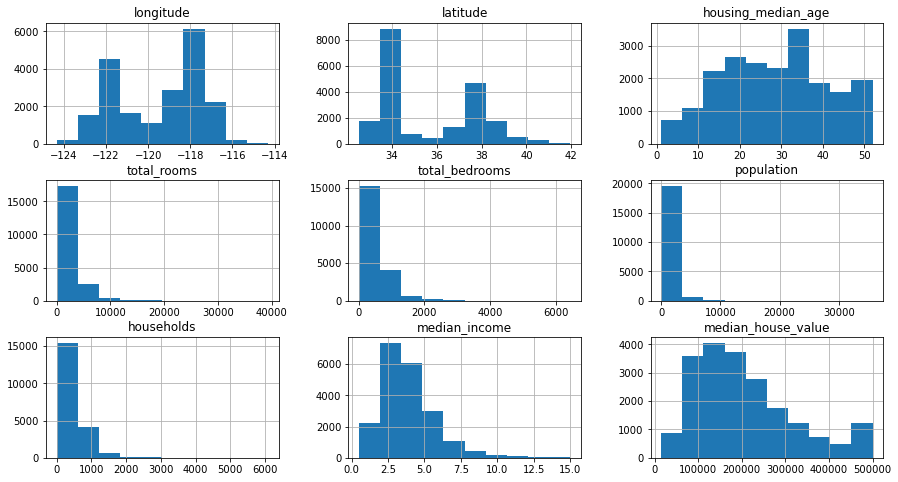

In [43]:
#to see the distribution of various features
data.hist(figsize=(15,8))

<AxesSubplot:>

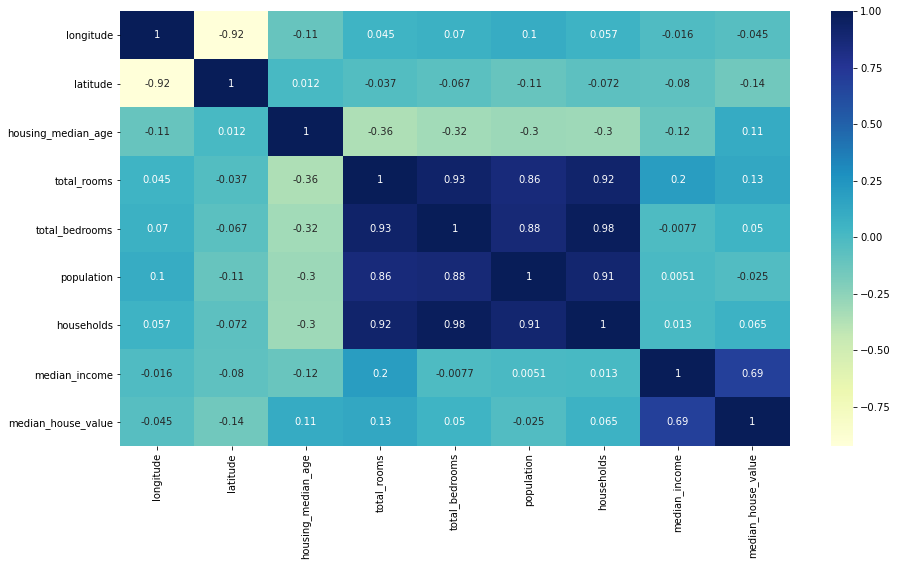

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

# data preparation

In [45]:
import numpy as np

In [46]:
data['total_rooms']=np.log(data['total_rooms']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)
data['population']=np.log(data['population']+1)
data['households']=np.log(data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

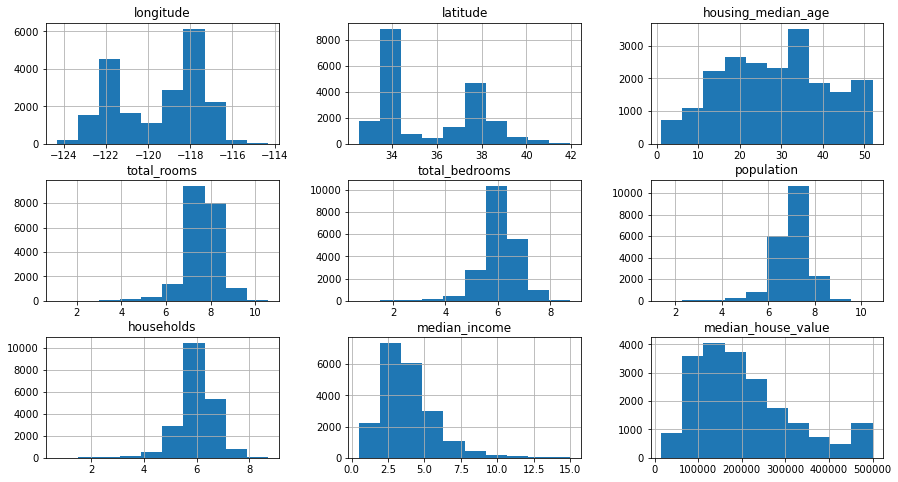

In [47]:
data.hist(figsize=(15,8))

In [48]:
# assumming that the ocean proximity is important attribute 
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [49]:
pd.get_dummies(data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [50]:
# join this data with train_data
data=data.join(pd.get_dummies(data.ocean_proximity))

In [51]:
data['<1H OCEAN']=data['<1H OCEAN'].astype(float)
data['INLAND']=data['INLAND'].astype(float)
data['NEAR BAY']=data['NEAR BAY'].astype(float)
data['NEAR OCEAN']=data['NEAR OCEAN'].astype(float)

In [52]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,NEAR BAY,0.0,0.0,0,1.0,0.0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,NEAR BAY,0.0,0.0,0,1.0,0.0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,NEAR BAY,0.0,0.0,0,1.0,0.0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,NEAR BAY,0.0,0.0,0,1.0,0.0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,NEAR BAY,0.0,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,INLAND,0.0,1.0,0,0.0,0.0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,INLAND,0.0,1.0,0,0.0,0.0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,INLAND,0.0,1.0,0,0.0,0.0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,INLAND,0.0,1.0,0,0.0,0.0


In [53]:
data=data.drop(["ocean_proximity"],axis=1)

In [54]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0.0,0.0,0,1.0,0.0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0.0,0.0,0,1.0,0.0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0.0,0.0,0,1.0,0.0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0.0,0.0,0,1.0,0.0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0.0,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0.0,1.0,0,0.0,0.0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0.0,1.0,0,0.0,0.0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0.0,1.0,0,0.0,0.0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0.0,1.0,0,0.0,0.0


<AxesSubplot:>

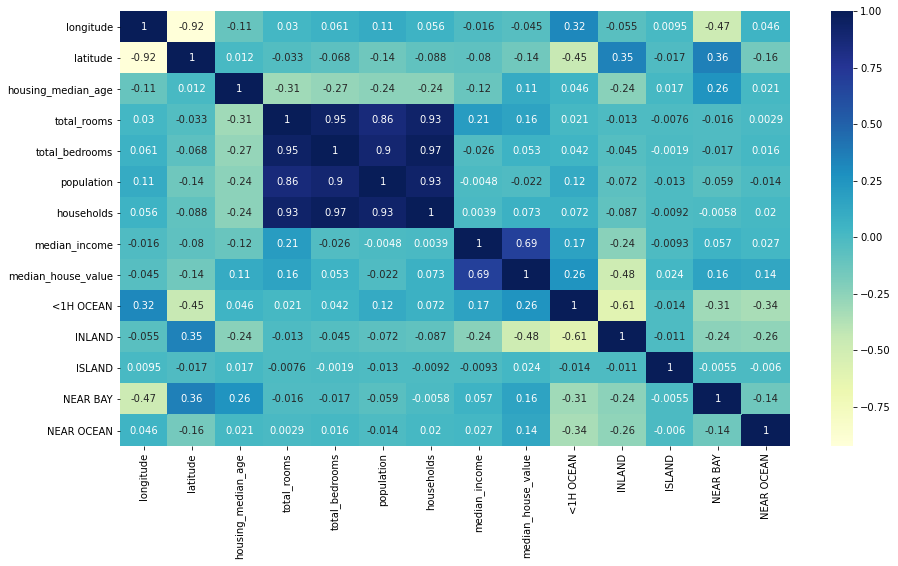

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

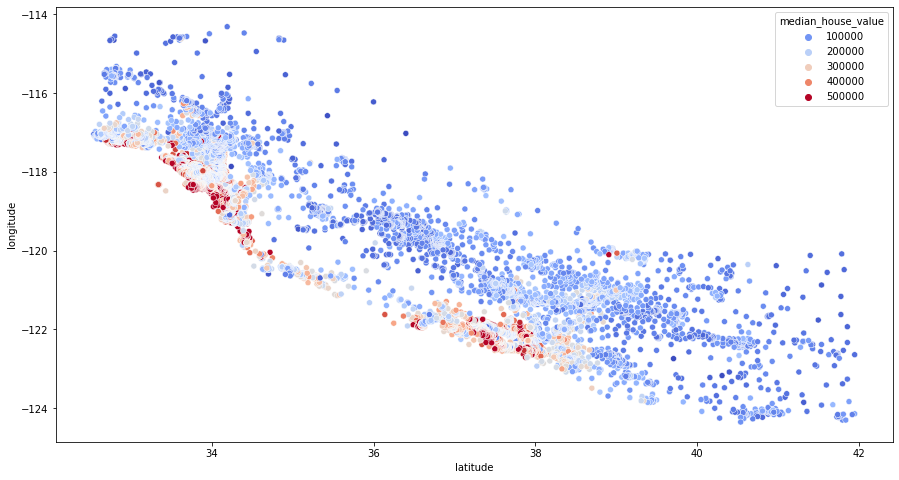

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=data,hue="median_house_value",palette="coolwarm")

# feature Engineering

In [57]:
data['bedroom_ratio']=data['total_bedrooms']/data['total_rooms']
data['household_ratio']=data['total_bedrooms']/data['households']

In [68]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_ratio
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0.0,0.0,0,1.0,0.0,0.717813,1.004820
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0.0,0.0,0,1.0,0.0,0.790429,0.995951
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0.0,0.0,0,1.0,0.0,0.720313,1.013603
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0.0,0.0,0,1.0,0.0,0.764097,1.013016
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0.0,0.0,0,1.0,0.0,0.762444,1.013968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0.0,1.0,0,0.0,0.0,0.798973,1.021511
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0.0,1.0,0,0.0,0.0,0.766205,1.057398
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0.0,1.0,0,0.0,0.0,0.801228,1.018634
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0.0,1.0,0,0.0,0.0,0.799078,1.027010


<AxesSubplot:>

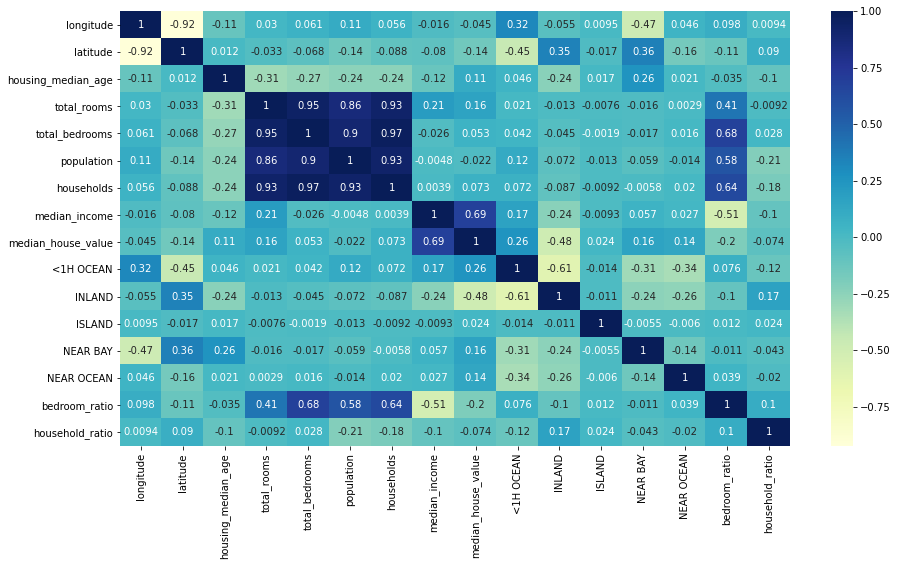

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [59]:
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [60]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)

# LinearRegression

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [62]:
model.score(X_test,y_test)

0.6688849960783869

# random forest model

In [63]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [64]:
forest.score(X_test,y_test)

0.8181052460957828

In [69]:
features = np.array([[-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0.0,0.0,0,1.0,0.0,0.720313,1.013603]])
print(forest.predict(features))

[372412.03]
